In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df = pd.read_csv('Maternal_Risk.csv')

In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          808 non-null    int64  
 1   SystolicBP   808 non-null    int64  
 2   DiastolicBP  808 non-null    int64  
 3   BS           808 non-null    float64
 4   BodyTemp     808 non-null    float64
 5   HeartRate    808 non-null    int64  
 6   RiskLevel    808 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 44.3+ KB


In [14]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,30.585396,112.972772,77.500000,9.264839,98.640347,74.547030
std,13.922075,19.924312,14.772207,3.617635,1.386501,7.808759
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000
25%,19.000000,90.000000,65.000000,7.000000,98.000000,70.000000
50%,27.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,40.000000,120.000000,90.000000,11.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [5]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

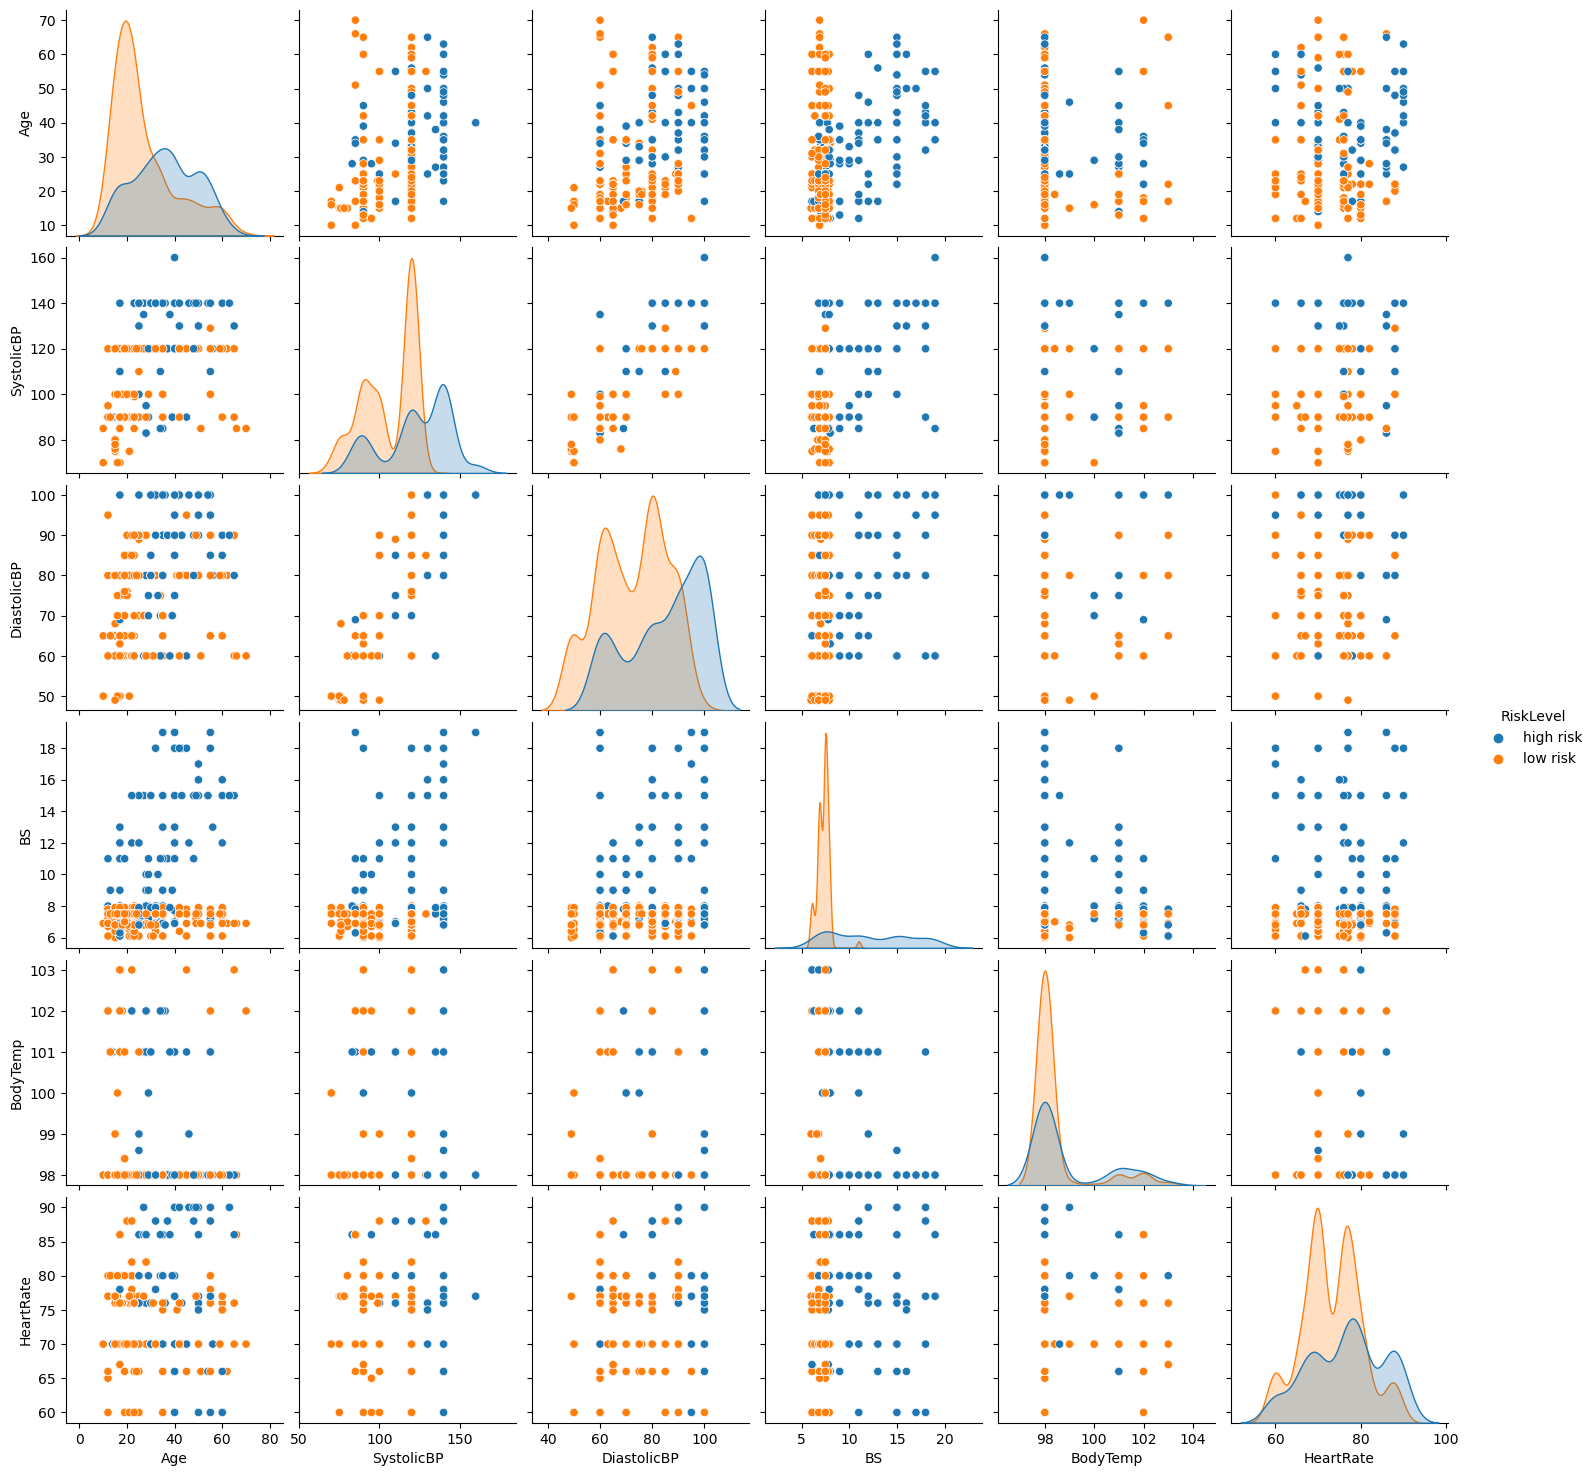

In [7]:
sns.pairplot(df, hue ='RiskLevel')

In [8]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

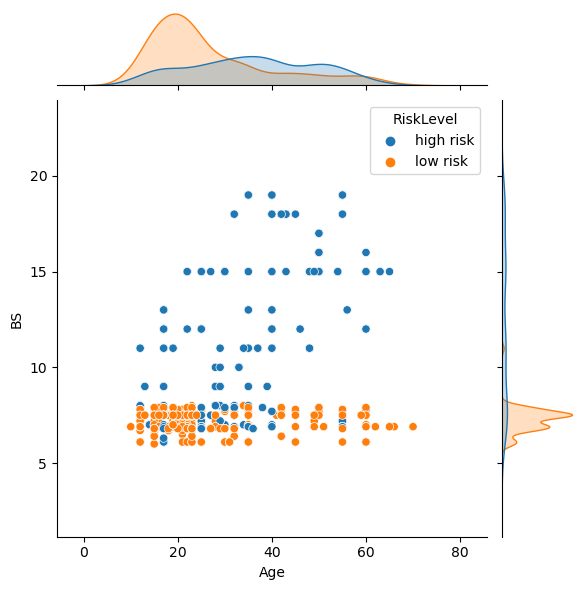

In [10]:
sns.jointplot(x ='Age', y ='BS', data = df, hue = 'RiskLevel')

<Axes: xlabel='RiskLevel', ylabel='count'>

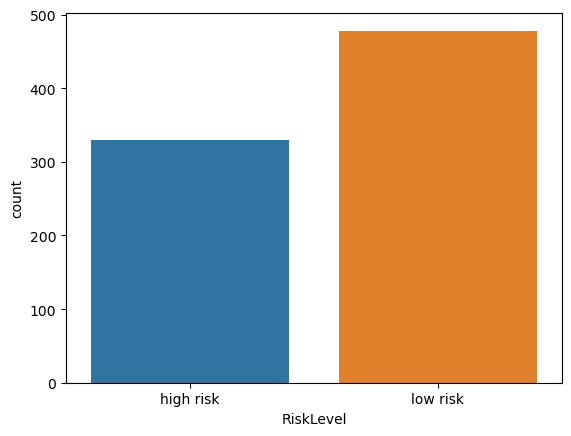

In [12]:
sns.countplot(x= 'RiskLevel', data = df)

<Axes: xlabel='RiskLevel', ylabel='Age'>

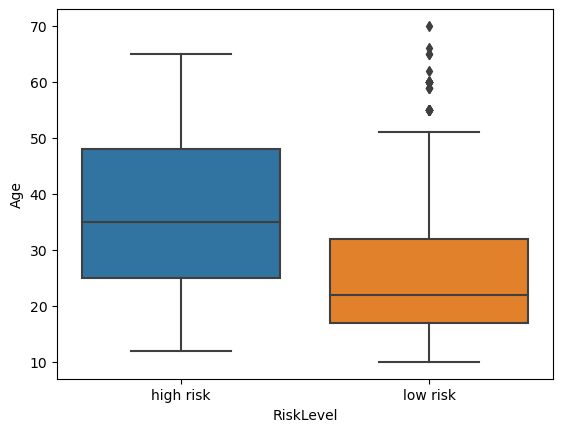

In [13]:
sns.boxplot(x= 'RiskLevel', y ='Age', data = df)

C:\Users\francis mawutor\AppData\Local\Temp\ipykernel_22808\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

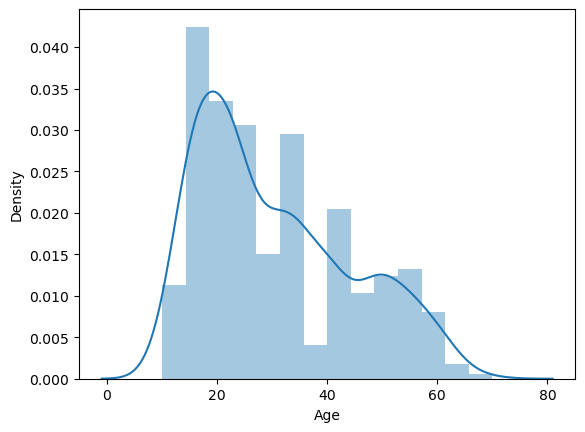

In [22]:
sns.distplot(df['Age'])

In [45]:
age_high = df.Age.value_counts().head(15)
age_high

15    66
17    59
23    52
35    50
32    44
40    43
25    42
19    38
22    37
50    34
55    34
21    28
12    27
60    25
48    25
Name: Age, dtype: int64

<Axes: >

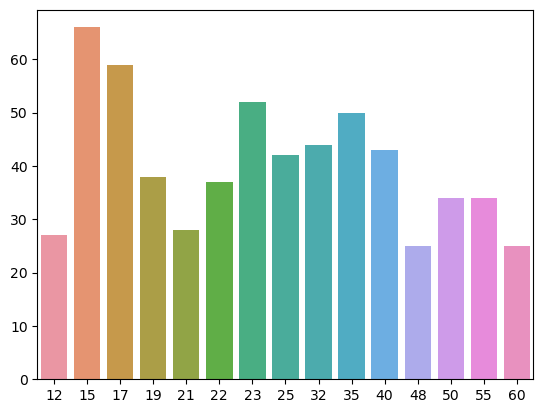

In [46]:
sns.barplot(x= age_high.index, y= age_high.values)

In [47]:
d = {'high risk' :1, 'low risk': 0}

In [48]:
df['RiskLevel'] = df['RiskLevel'].map(d)

In [50]:
x =df.drop('RiskLevel', axis =1)
y = df['RiskLevel']

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()

In [62]:
sc.fit(x)

StandardScaler()

In [131]:
scaled_x = sc.transform(x)

In [134]:
dtf = pd.DataFrame(scaled_x, columns= x.columns)

C:\Users\francis mawutor\AppData\Local\Temp\ipykernel_22808\916309808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf['Age'])


<Axes: xlabel='Age', ylabel='Density'>

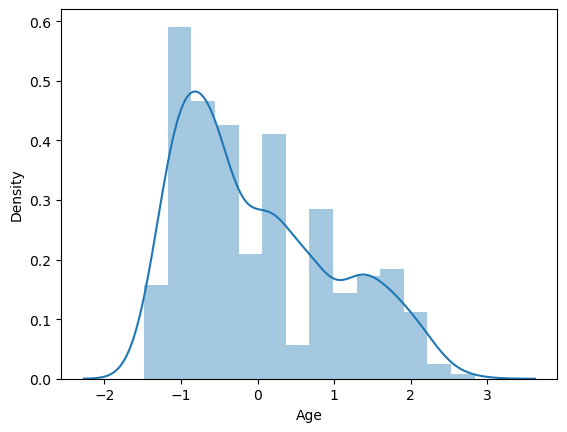

In [139]:
sns.distplot(dtf['Age'])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = .3, random_state= 101)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [123]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [124]:
kp = knn.predict(x_test)

In [125]:
data = pd.DataFrame()

In [126]:
data['Actual'] = y_test
data['Pred'] = kp

In [127]:
print(data)

     Actual  Pred
427       1     1
768       1     1
287       0     0
551       0     1
773       0     0
..      ...   ...
180       0     0
354       0     0
601       0     0
621       1     1
545       0     0

[243 rows x 2 columns]


In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [128]:
print(classification_report(kp, y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       148
           1       0.95      0.97      0.96        95

    accuracy                           0.97       243
   macro avg       0.96      0.97      0.97       243
weighted avg       0.97      0.97      0.97       243



In [129]:
confusion_matrix(kp, y_test)

array([[143,   5],
       [  3,  92]], dtype=int64)

In [102]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict = knn.predict(x_test)
    error_rate.append(np.mean(predict != y_test))

Text(0.5, 1.0, 'Error vs Number of Neighbors')

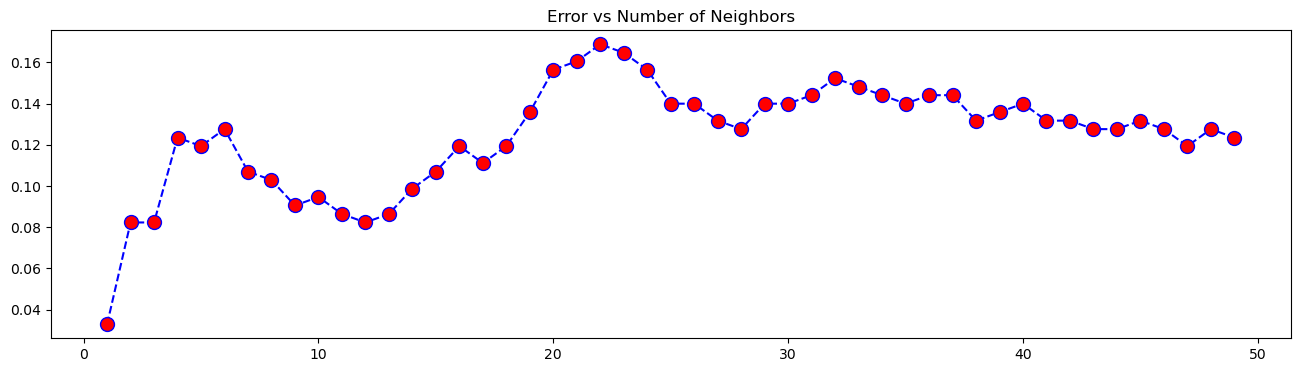

In [111]:
plt.figure(figsize =(16,4))
plt.plot(range(1,50), error_rate, color = 'blue', linestyle = '--', marker = 'o', markerfacecolor ='red', 
        markersize = 10)
plt.title('Error vs Number of Neighbors')

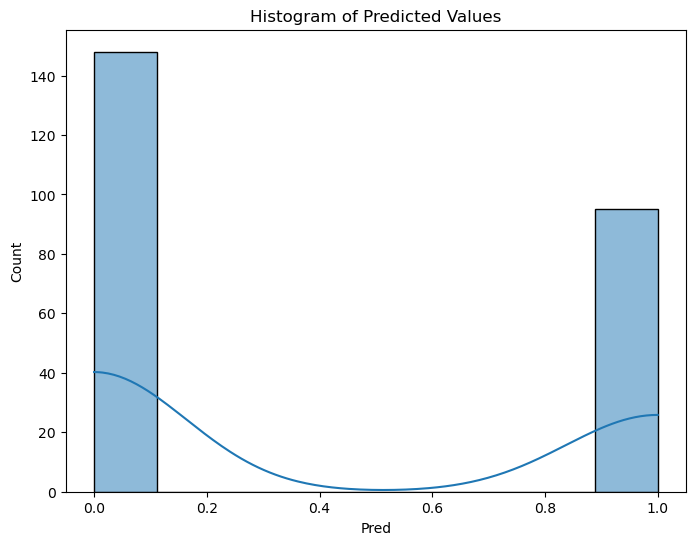

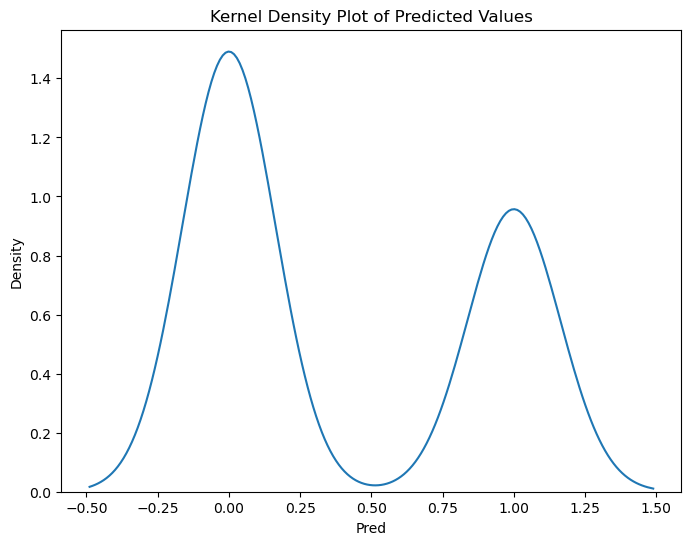

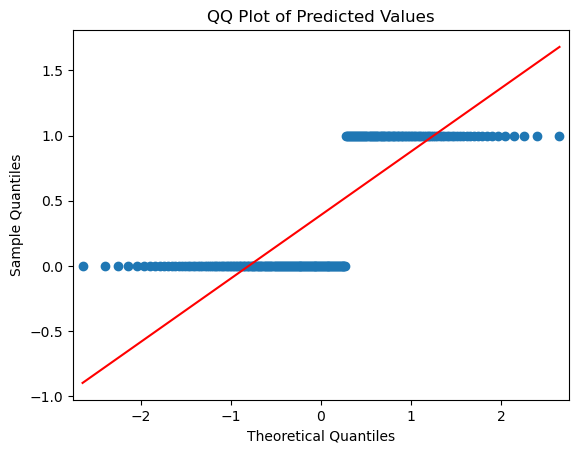

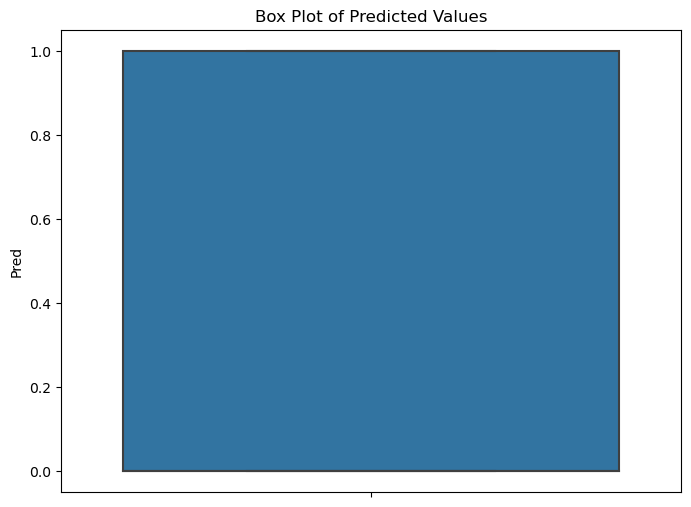

<Figure size 800x600 with 0 Axes>

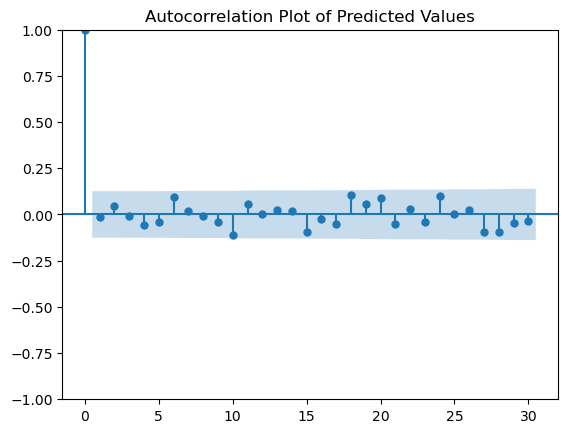

NameError: name 'Actual' is not defined

In [141]:

import statsmodels.api as sm


# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Pred', kde=True)
plt.title('Histogram of Predicted Values')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Pred')
plt.title('Kernel Density Plot of Predicted Values')
plt.show()

# QQ Plot
sm.qqplot(data['Pred'], line='s')
plt.title('QQ Plot of Predicted Values')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Pred')
plt.title('Box Plot of Predicted Values')
plt.show()

# Autocorrelation Plot
plt.figure(figsize=(8, 6))
sm.graphics.tsa.plot_acf(data['Pred'], lags=30)
plt.title('Autocorrelation Plot of Predicted Values')
plt.show()


# Residual Plot
# Assuming you have the actual values in a variable called 'actual_values'
residuals = Actual - pred
plt.figure(figsize=(8, 6))
plt.scatter(pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
